<a href="https://colab.research.google.com/github/letianzj/QuantResearch/blob/master/ml/sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SARSA FrozenLake

Use SARSA to solve FrozenLake game.

[OpenAI Gym FrozenLake](https://gym.openai.com/envs/FrozenLake-v0/) is defined on a 4x4 matrix. The agent wants to go from top left (S) to bottom right (G). Each grid can be either frozen surface (F) or hold (H). Four possible actions or moves are Left: 0, Down: 1, Right: 2, Up: 3. If the agent reaches goal (G), she receives reward of 1.

SARSA is on policy, value based, TD method to solve control problems. The Q-value is updated by

$$
Q(s, a) \leftarrow Q(s,a) + \alpha \left( r+\gamma Q(s',a') - Q(s,a) \right)
$$

__Reference__
* Sutton, Richard S., and Andrew G. Barto. Reinforcement learning: An introduction. MIT press, 2018.
* [RL by David Silver](https://www.davidsilver.uk/teaching/)
* [Lil'Log](https://lilianweng.github.io/lil-log/)
* [Deep Learning with TensorFlow](https://github.com/dragen1860/Deep-Learning-with-TensorFlow-book)
* [Reinforcement Learning](https://github.com/dennybritz/reinforcement-learning)
* [marcinbogdanski](https://marcinbogdanski.github.io/reinforcement-learning.html)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym

In [17]:
env = gym.make('FrozenLake-v0', is_slippery=True)   # may not head for the direction chosen

In [33]:
n_episodes = 1000
alpha = 0.5                 # TD learning rate
epsilon = 0.1               # epsilon greedy
epsilon_final = 0.05
epsilon_decay = (epsilon-epsilon_final)/n_episodes   # epsilon annealing
gamma = 0.99                # discount factor

# Q-Table, default to 0
Q = np.zeros((env.observation_space.n, env.action_space.n))
# action space
actions = range(env.action_space.n)

In [37]:
reward_history = []
step_history = []

for n_episode in range(n_episodes):
    s = env.reset()          # reset to initial state
    # env.render()
    done = False
    reward = 0.
    step = 0

    # choose action according to epsilon greedy
    a = 0
    if np.random.rand() < epsilon:
        a = env.action_space.sample()
    else:   # randomly pick one in case of a tie
        candidates = np.argwhere(Q[s, :] == np.amax(Q[s, :]))
        candidates = candidates.reshape(-1,)
        a = np.random.choice(candidates)

    while not done:
        # use a' to interact with environment
        s_prime, r, done, info = env.step(a)
        step += 1
        reward += r

        # choose action_prime according to epsilon greedy
        a_prime = 0
        if np.random.rand() < epsilon:
            a_prime = env.action_space.sample()
        else:   # randomly pick one in case of a tie
            candidates = np.argwhere(Q[s_prime, :] == np.amax(Q[s_prime, :]))
            candidates = candidates.reshape(-1,)
            a_prime = np.random.choice(candidates)
        
        # update q table
        Q[s, a] = Q[s, a] + alpha * (r + gamma * Q[s_prime, a_prime] - Q[s, a])

        # ready for next step
        s = s_prime
        a = a_prime

    reward_history.append(reward)
    step_history.append(step)

    epsilon -= epsilon_decay

    if (n_episode + 1) % 200 == 0:
        print(f'Episode {n_episode + 1}/{n_episodes}.')

Episode 200/1000.
Episode 400/1000.
Episode 600/1000.
Episode 800/1000.
Episode 1000/1000.


In [38]:
env.close()

Text(0.5, 1.0, 'Average steps')

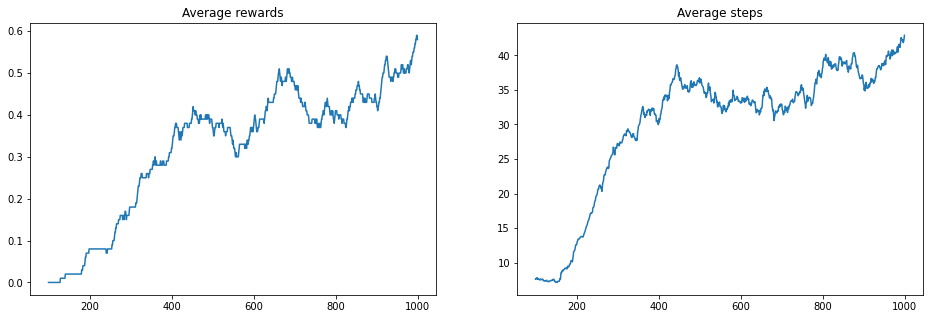

In [39]:
df_stats = pd.DataFrame.from_dict({'rewards': reward_history, 'steps': step_history})
fig, ax = plt.subplots(1, 2, figsize=(16,5))
df_stats['rewards'].rolling(100).mean().plot(ax=ax[0])
ax[0].set_title('Average rewards')
df_stats['steps'].rolling(100).mean().plot(ax=ax[1])
ax[1].set_title('Average steps')